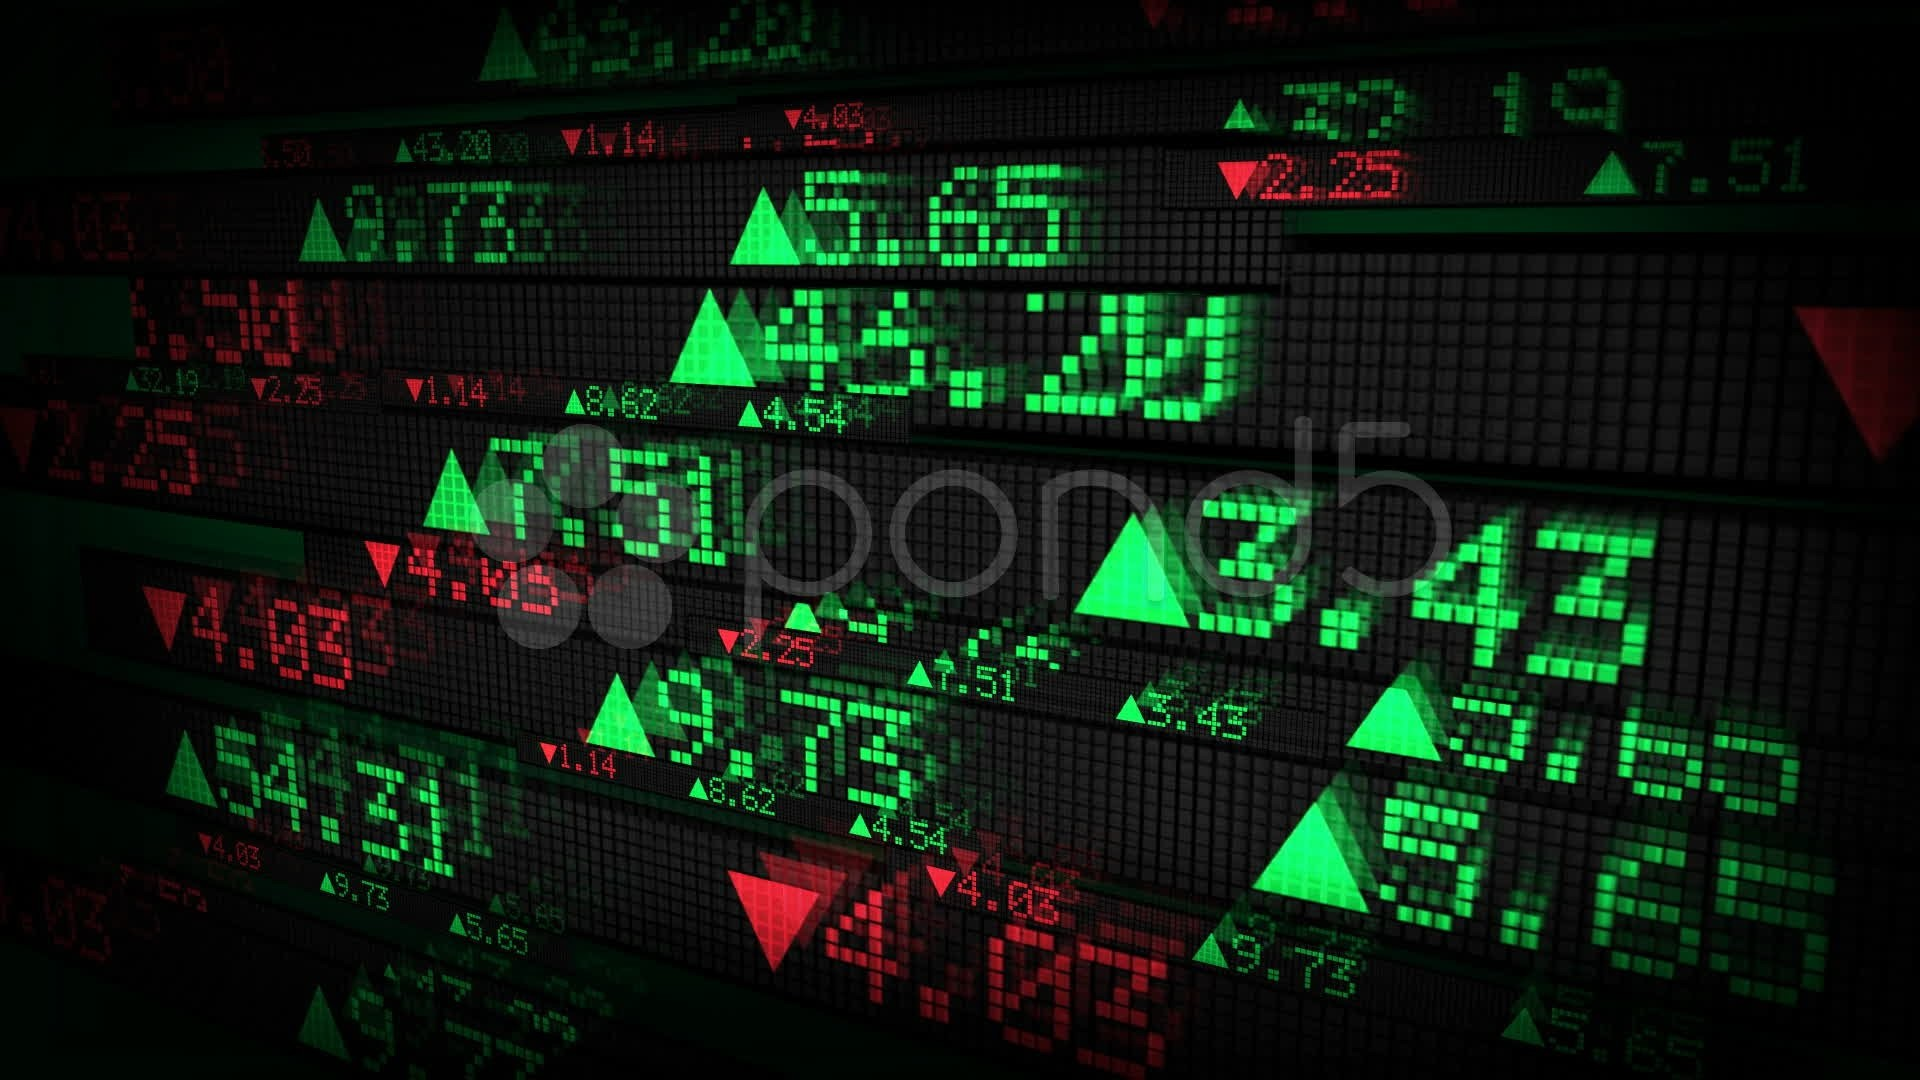

# Comparison of Tata Steel and Tata Motors Stock Prices

## Overview
This analysis aims to compare the historical stock prices of Tata Steel and Tata Motors. The primary focus is to visualize and analyze the stock price trends, evaluate their performance in training and testing data, and examine the residuals to understand potential model errors or patterns in prediction accuracy.

### Objective
- **Comparison of Stock Prices:** Visualize and compare the historical stock prices of Tata Steel and Tata Motors.
- **Model Performance Evaluation:** Assess the performance of LSTM models trained on these stocks and analyze their predictions against actual stock prices.
- **Residuals Analysis:** Examine residuals (difference between predicted and actual prices) to identify any systematic errors or trends.

This analysis utilizes LSTM models to forecast stock prices, splitting the data into training and testing sets, and visualizes the model's performance on both stocks. The goal is to gain insights into the historical price behavior and predictive capabilities of the models for these companies' stocks.



# Step 1: Import Libraries

Import the necessary libraries/modules required for data manipulation, preprocessing, modeling, and visualization.


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Set style to 'dark_background' for a black background
plt.style.use('dark_background')

# Step 2: Load Data

- Load the historical stock price data from a CSV file for a specific ticker symbol (e.g., 'AAPL.csv').
- Convert the 'Date' column to datetime format and set it as the index for time-based analysis.
- Sort the data based on the index ('Date') in ascending order.


In [3]:
# Load data for Tata Steel (replace 'TataSteel.csv' with your file)
file_path_tata_steel = 'Stock data\TATASTEEL.csv'  # Replace with the Tata Steel file path
data_tata_steel = pd.read_csv(file_path_tata_steel)

# Load data for Tata Motors (replace 'TataMotors.csv' with your file)
file_path_tata_motors = 'Stock data\TATAMOTORS.csv'  # Replace with the Tata Motors file path
data_tata_motors = pd.read_csv(file_path_tata_motors)

# Step 3: Preprocessing

- Initialize a MinMaxScaler to scale the 'Close' prices to a range between 0 and 1.
- Reshape the 'Close' prices and apply the scaler to normalize the values.


In [32]:
# Preprocess the data (if needed)
# Assuming the data is already preprocessed and scaled

# Splitting the data into train and test sets (80-20 split)
split = int(0.8 * len(data_tata_steel))
train_data_tata_steel = data_tata_steel[:split]['Close'].values.reshape(-1, 1)
test_data_tata_steel = data_tata_steel[split:]['Close'].values.reshape(-1, 1)

split = int(0.8 * len(data_tata_motors))
train_data_tata_motors = data_tata_motors[:split]['Close'].values.reshape(-1, 1)
test_data_tata_motors = data_tata_motors[split:]['Close'].values.reshape(-1, 1)





# Step 4: Creating Sequences

- Define a window size to create sequences of historical stock prices. This step involves creating input sequences and their corresponding output (target) for the LSTM model.


In [33]:

# Define window size for sequences
window_size = 60

# Create sequences of data for training
def create_sequences(data, window_size):
    sequences = []
    for i in range(window_size, len(data)):
        sequences.append(data[i-window_size:i, 0])
    return np.array(sequences)

# Create sequences for Tata Steel and Tata Motors
train_sequences_tata_steel = create_sequences(train_data_tata_steel, window_size)
test_sequences_tata_steel = create_sequences(test_data_tata_steel, window_size)

train_sequences_tata_motors = create_sequences(train_data_tata_motors, window_size)
test_sequences_tata_motors = create_sequences(test_data_tata_motors, window_size)




# Step 5: Split Data

- Split the sequences into training and testing sets for model training and evaluation.


In [34]:
# Split sequences into features and target
X_train_tata_steel, y_train_tata_steel = train_sequences_tata_steel[:, :-1], train_sequences_tata_steel[:, -1]
X_test_tata_steel, y_test_tata_steel = test_sequences_tata_steel[:, :-1], test_sequences_tata_steel[:, -1]

X_train_tata_motors, y_train_tata_motors = train_sequences_tata_motors[:, :-1], train_sequences_tata_motors[:, -1]
X_test_tata_motors, y_test_tata_motors = test_sequences_tata_motors[:, :-1], test_sequences_tata_motors[:, -1]

# Reshape data for LSTM input
X_train_tata_steel = np.reshape(X_train_tata_steel, (X_train_tata_steel.shape[0], X_train_tata_steel.shape[1], 1))
X_test_tata_steel = np.reshape(X_test_tata_steel, (X_test_tata_steel.shape[0], X_test_tata_steel.shape[1], 1))

X_train_tata_motors = np.reshape(X_train_tata_motors, (X_train_tata_motors.shape[0], X_train_tata_motors.shape[1], 1))
X_test_tata_motors = np.reshape(X_test_tata_motors, (X_test_tata_motors.shape[0], X_test_tata_motors.shape[1], 1))


# Step 6: Build LSTM Model for TATA Steel

- Construct an LSTM neural network using the Keras Sequential API.
- Add LSTM layers with dropout regularization to avoid overfitting.
- Use the 'adam' optimizer and specify the loss function for model compilation.


In [7]:


# Build LSTM model
model_tata_steel = Sequential()
model_tata_steel.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_tata_steel.shape[1], 1)))
model_tata_steel.add(Dropout(0.2))
model_tata_steel.add(LSTM(units=50, return_sequences=False))
model_tata_steel.add(Dropout(0.2))
model_tata_steel.add(Dense(units=1))

model_tata_steel.compile(optimizer='adam', loss='mean_squared_error')



# Step 7: Train the Model 

- Train the LSTM model using the training sequences and their corresponding target values (output).


In [8]:

# Train the model for Tata Steel
model_tata_steel.fit(X_train_tata_steel, y_train_tata_steel, epochs=25, batch_size=32)


Epoch 1/25
131/131 [==============================] - 31s 182ms/step - loss: 170838.8906
Epoch 2/25
131/131 [==============================] - 25s 193ms/step - loss: 163801.6406
Epoch 3/25
131/131 [==============================] - 25s 188ms/step - loss: 158765.6094
Epoch 4/25
131/131 [==============================] - 22s 166ms/step - loss: 154117.2031
Epoch 5/25
131/131 [==============================] - 21s 160ms/step - loss: 149581.2344
Epoch 6/25
131/131 [==============================] - 21s 161ms/step - loss: 145255.7656
Epoch 7/25
131/131 [==============================] - 23s 175ms/step - loss: 140978.3594
Epoch 8/25
131/131 [==============================] - 25s 192ms/step - loss: 136989.8125
Epoch 9/25
131/131 [==============================] - 24s 187ms/step - loss: 132901.0469
Epoch 10/25
131/131 [==============================] - 24s 184ms/step - loss: 129054.0078
Epoch 11/25
131/131 [==============================] - 22s 168ms/step - loss: 125205.9688
Epoch 12/25
131/131

# Similarly, build and train for TATA Motors

In [9]:

# Build LSTM model for Tata Motors
model_tata_motors = Sequential()
model_tata_motors.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_tata_motors.shape[1], 1)))
model_tata_motors.add(Dropout(0.2))
model_tata_motors.add(LSTM(units=50, return_sequences=False))
model_tata_motors.add(Dropout(0.2))
model_tata_motors.add(Dense(units=1))

model_tata_motors.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for Tata Motors
model_tata_motors.fit(X_train_tata_motors, y_train_tata_motors, epochs=25, batch_size=32)




Epoch 1/25
131/131 [==============================] - 26s 161ms/step - loss: 277044.2500
Epoch 2/25
131/131 [==============================] - 19s 143ms/step - loss: 268799.8125
Epoch 3/25
131/131 [==============================] - 19s 146ms/step - loss: 262869.0938
Epoch 4/25
131/131 [==============================] - 19s 144ms/step - loss: 257230.1719
Epoch 5/25
131/131 [==============================] - 20s 152ms/step - loss: 251639.8906
Epoch 6/25
131/131 [==============================] - 19s 146ms/step - loss: 246336.5000
Epoch 7/25
131/131 [==============================] - 21s 157ms/step - loss: 241234.0156
Epoch 8/25
131/131 [==============================] - 29s 222ms/step - loss: 236089.6406
Epoch 9/25
131/131 [==============================] - 22s 165ms/step - loss: 231162.1562
Epoch 10/25
131/131 [==============================] - 21s 157ms/step - loss: 226382.9688
Epoch 11/25
131/131 [==============================] - 20s 156ms/step - loss: 221740.2344
Epoch 12/25
131/131

# Step 8: Evaluate the Model

- Evaluate the model's performance using the testing dataset to calculate the loss.


In [10]:
# Evaluate the model
loss_tata_motors = model_tata_motors.evaluate(X_test_tata_motors, y_test_tata_motors)
loss_tata_steel = model_tata_steel.evaluate(X_test_tata_steel, y_test_tata_steel)


32/32 [==============================] - 2s 50ms/step - loss: 150309.6719


# Step 9: Make Predictions

- Use the trained LSTM model to predict stock prices for the test dataset.
- Inverse transform the predicted values to bring them back to their original scale.


In [11]:


# Predictions for Tata Steel
predictions_tata_steel = model_tata_steel.predict(X_test_tata_steel)

# Predictions for Tata Motors
predictions_tata_motors = model_tata_motors.predict(X_test_tata_motors)


32/32 [==============================] - 4s 50ms/step


# Step 10: Visualizations

- Plot the actual vs. predicted stock prices to visually assess the model's performance in predicting prices.


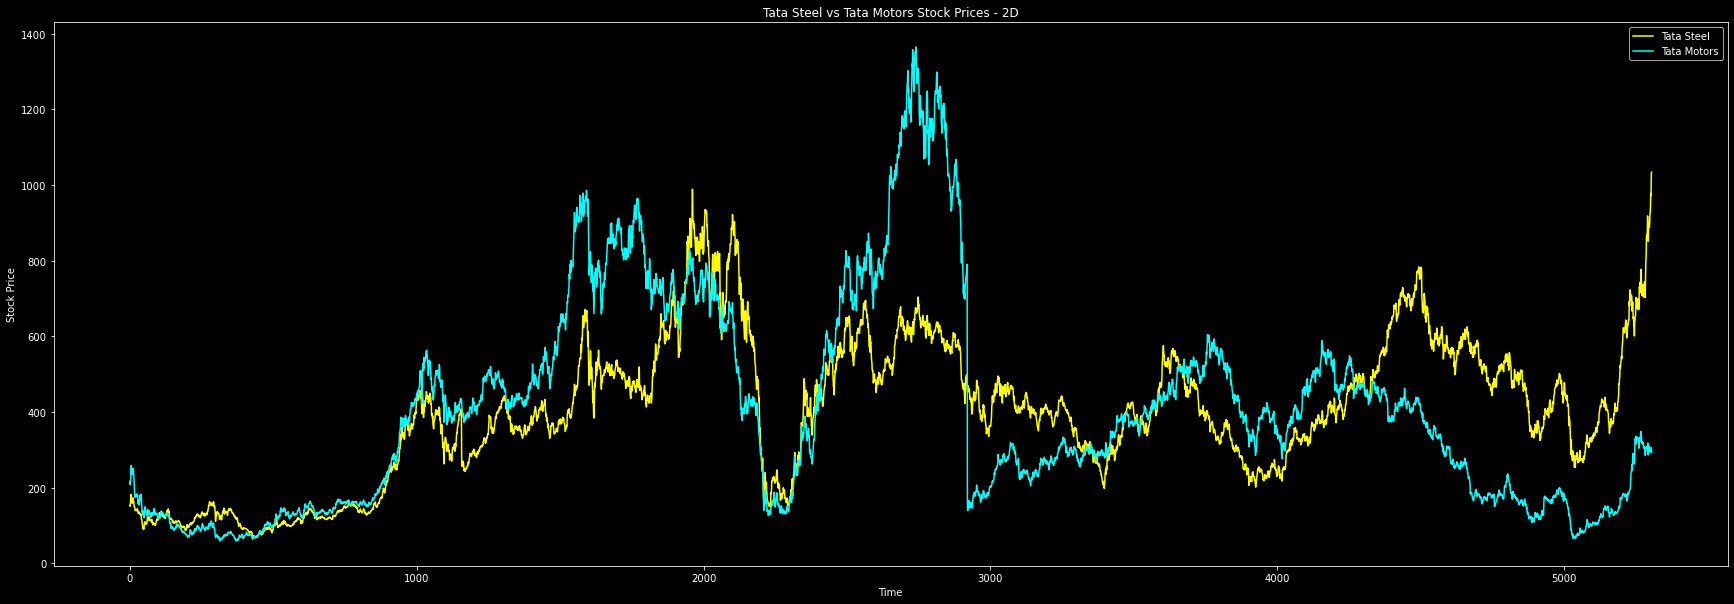

In [29]:
# Visualizations
# 2D Plotting Tata Steel and Tata Motors stock prices
plt.figure(figsize=(30, 10))
#plt.plot(y_test_tata_steel, label='Actual TATA Steel Prices')
#plt.plot(y_test_tata_motors, label='Actual TATA Motors Prices')
plt.plot(data_tata_steel['Close'], label='Tata Steel', color='yellow')
plt.plot(data_tata_motors['Close'], label='Tata Motors', color='cyan')
plt.legend()
plt.title('Tata Steel vs Tata Motors Stock Prices - 2D')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

## 3D Plotting combined Tata Steel and Tata Motors stock prices
#fig = plt.figure(figsize=(30, 60))
#ax = fig.add_subplot(111, projection='3d')
#
#for i in range(len(data_tata_steel['Close'])):
#    ax.scatter(i, data_tata_steel['Close'][i], zs=0, zdir='y', label='Tata Steel', color='yellow')
#    ax.scatter(i, data_tata_motors['Close'][i], zs=1, zdir='y', label='Tata Motors', color='cyan')
#
#ax.legend()
#ax.set_title('Tata Steel vs Tata Motors Stock Prices - 3D')
#ax.set_xlabel('Index')
#ax.set_ylabel('Stock Price')
#ax.set_zlabel('Price')

plt.show()

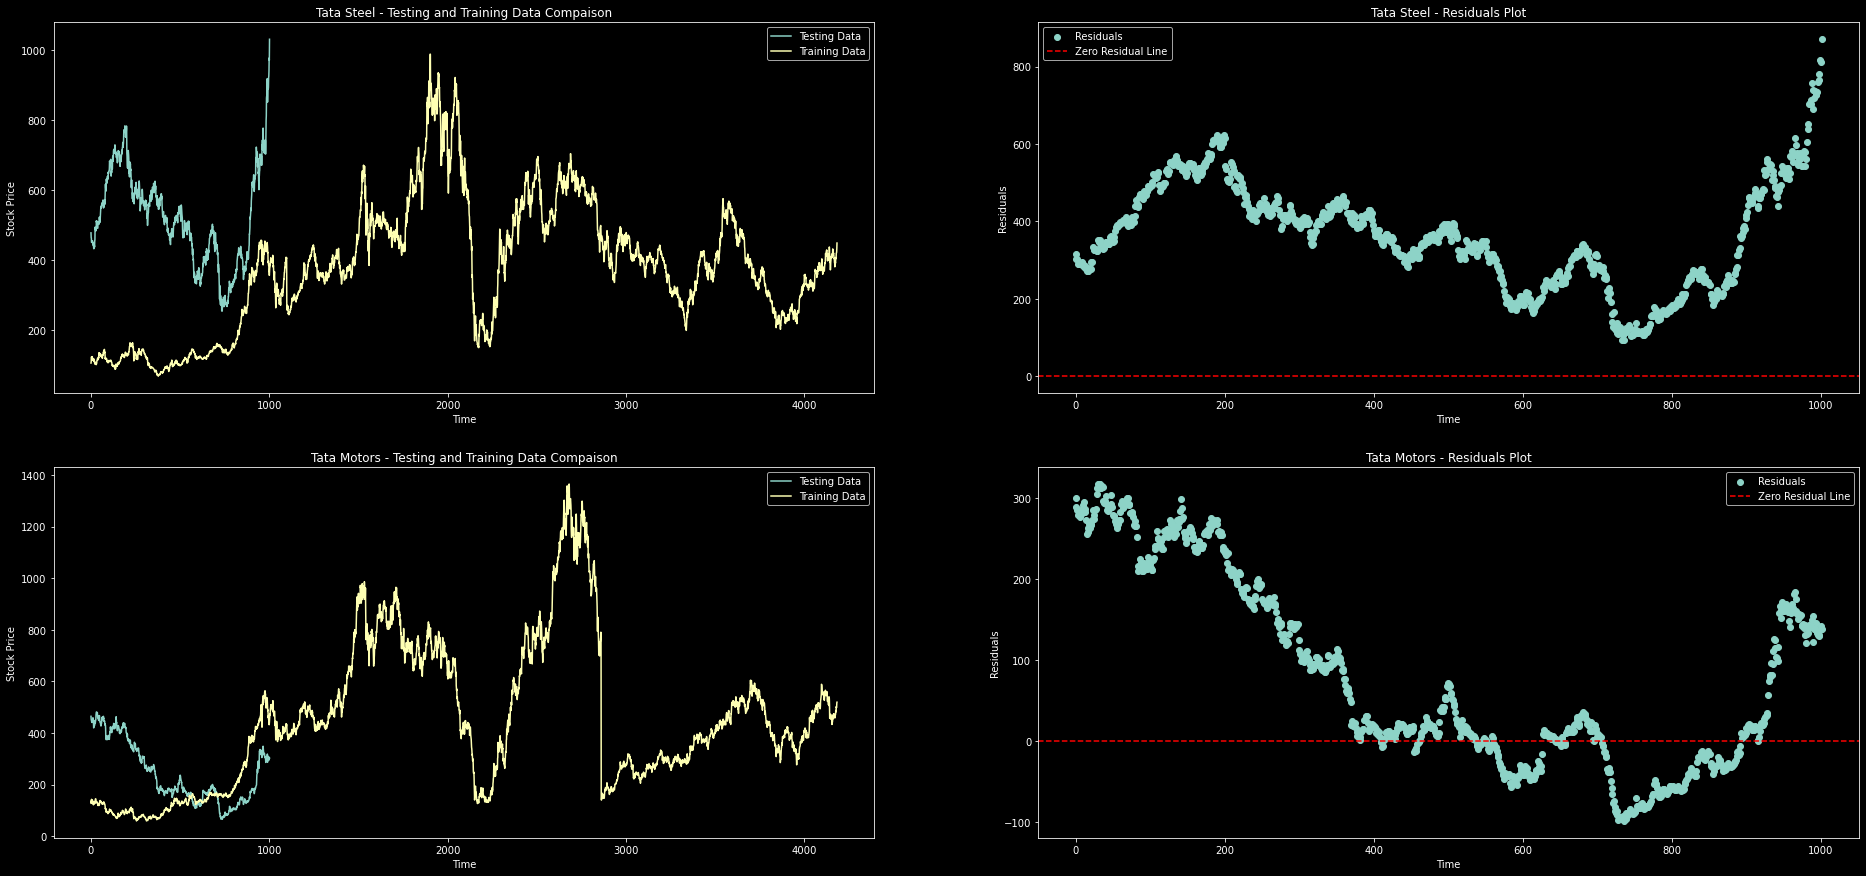

In [31]:


# Additional visualizations for Tata Steel and Tata Motors comparison in both 2D and 3D with combined plots
plt.figure(figsize=(50, 15))



# Plotting testing data for Tata Steel
plt.subplot(2, 3, 2)
plt.plot(y_test_tata_steel, label='Testing Data')
plt.plot(y_train_tata_steel, label='Training Data')
plt.legend()
plt.title('Tata Steel - Testing and Training Data Compaison')
plt.xlabel('Time')
plt.ylabel('Stock Price')

# Plotting residuals for Tata Steel
plt.subplot(2, 3, 3)
residuals_tata_steel = y_test_tata_steel - predictions_tata_steel.flatten()
plt.scatter(np.arange(len(residuals_tata_steel)), residuals_tata_steel, label='Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line')
plt.legend()
plt.title('Tata Steel - Residuals Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')



# Plotting testing data for Tata Motors
plt.subplot(2, 3, 5)
plt.plot(y_test_tata_motors, label='Testing Data')
plt.plot(y_train_tata_motors, label='Training Data')
plt.legend()
plt.title('Tata Motors - Testing and Training Data Compaison')
plt.xlabel('Time')
plt.ylabel('Stock Price')

# Plotting residuals for Tata Motors
plt.subplot(2, 3, 6)
residuals_tata_motors = y_test_tata_motors - predictions_tata_motors.flatten()
plt.scatter(np.arange(len(residuals_tata_motors)), residuals_tata_motors, label='Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line')
plt.legend()
plt.title('Tata Motors - Residuals Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')

#plt.tight_layout()
plt.show()



# ------------------------------------------------- END OF ANALYSIS ---------------------------------------